In [283]:
import pandas as pd
from strategy import Strategy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = Strategy.load_dataset()
df = df.rename(columns={
        f"bet365_1X2 Full Time_outcome_{i}_closing_value": f"bet365_{i}" for i in range(1, 4)
})
def cpt_winner(g1, g2):
        if g1 > g2:
            return 1
        elif g1 < g2:
            return 3
        else:
            return 2
df['result'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: cpt_winner(x[0], x[1]), axis=1)


In [284]:
import os
strategies = os.listdir('strategies')
print(f"NUMBER: {len(strategies)}")
strategies.sort(key=lambda x: - os.path.getmtime(f'strategies/{x}'))
print('\n'.join(strategies))

NUMBER: 34
strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__3.json
strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__2.json
strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__1.json
strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__3.json
strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__2.json
strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__1.json
strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__3.json
strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__2.json
strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__1.json
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__3.json
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__2.json
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__1.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__3.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__2.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__1.json
strategy_H_G_rank_1__A_GA_rank_2__3.json
strategy_H_G_rank_1__A_GA_rank_2__2.json
strategy_H_G_rank_1__A_GA_rank_2__1.json
strategy_H_

In [285]:
for s in strategies:
    strategy = Strategy.load_strategy_from_file(f'strategies/{s}')
    matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
    print(s)
    print(strategy)
    result = strategy.get('result')
    matches = matches.reset_index()
    print(f'Number of matches: {len(matches)}')
    print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
    print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
    print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
    print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
    print(f"Average odd: {matches[f'bet365_{result}'].mean()}")
    print()
    print()

strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__3.json
{'3M_H_GA_rank_coeff_1': [18, 26], '3M_A_G_rank_coeff_2': [20, 26], 'result': 3, 'bet365_3': [3.37, 8.47]}
Number of matches: 608
Total revenue (with 1 euro bets): 116.96
ROI: 19.236842105263158%
Winning bets: 164 / 608
Winning rate: 26.973684210526315 %
Average odd: 4.608322368421052


strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__2.json
{'3M_H_GA_rank_coeff_1': [13, 21], '3M_A_G_rank_coeff_2': [8, 19], 'result': 2, 'bet365_2': [6.6, 8.93]}
Number of matches: 121
Total revenue (with 1 euro bets): 48.0
ROI: 39.66942148760331%
Winning bets: 23 / 121
Winning rate: 19.00826446280992 %
Average odd: 7.433884297520661


strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__1.json
{'3M_H_GA_rank_coeff_1': [14, 26], '3M_A_G_rank_coeff_2': [1, 24], 'result': 1, 'bet365_1': [4.300000000000001, 9.84]}
Number of matches: 2748
Total revenue (with 1 euro bets): 383.29999999999995
ROI: 13.948326055312954%
Winning bets: 563 / 2748
Winning 

strategy_3M_H_GA_rank_1__3M_A_G_rank_2__2.json
{'3M_H_GA_rank_1': [15, 25], '3M_A_G_rank_2': [8, 10], 'result': 2, 'bet365_2': [6.700000000000001, 9.17]}
Number of matches: 16
Total revenue (with 1 euro bets): 50.5
ROI: 315.625%
Winning bets: 9 / 16
Winning rate: 56.25 %
Average odd: 7.5625


strategy_3M_H_GA_rank_1__3M_A_G_rank_2__1.json
{'3M_H_GA_rank_1': [11, 25], '3M_A_G_rank_2': [1, 28], 'result': 1, 'bet365_1': [4.28, 9.879999999999999]}
Number of matches: 3570
Total revenue (with 1 euro bets): 396.28
ROI: 11.100280112044818%
Winning bets: 711 / 3570
Winning rate: 19.915966386554622 %
Average odd: 5.8413949579831925


strategy_3M_P_rank_1__3M_P_rank_2__3.json
{'3M_P_rank_1': [13, 17], '3M_P_rank_2': [9, 15], 'result': 3, 'bet365_3': [5.07, 9.74]}
Number of matches: 1677
Total revenue (with 1 euro bets): 135.5
ROI: 8.079904591532499%
Winning bets: 291 / 1677
Winning rate: 17.352415026833633 %
Average odd: 6.428294573643411


strategy_3M_P_rank_1__3M_P_rank_2__2.json
{'3M_P_rank_1'

In [286]:
STRATEGY = 'strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__1.json'

In [287]:
strategy = Strategy.load_strategy_from_file(f'strategies/{STRATEGY}')
strategy

{'3M_H_GA_rank_coeff_1': [14, 26],
 '3M_A_G_rank_coeff_2': [1, 24],
 'result': 1,
 'bet365_1': [4.300000000000001, 9.84]}

In [288]:
matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
result = strategy.get('result')
matches = matches.reset_index()
print(f'Number of matches: {len(matches)}')
print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
print(f"Average odd: {matches[f'bet365_{result}'].mean()}")
print()

Number of matches: 2748
Total revenue (with 1 euro bets): 383.29999999999995
ROI: 13.948326055312954%
Winning bets: 563 / 2748
Winning rate: 20.487627365356623 %
Average odd: 5.821659388646288



In [289]:
print('Odds distribution')
print(matches[f'bet365_{result}'].value_counts())

Odds distribution
5.00    300
4.50    297
4.75    267
4.33    266
5.50    237
6.00    235
6.50    188
7.00    185
5.25    159
7.50    148
8.00    112
8.50     98
5.75     87
9.00     73
9.50     46
4.60     27
4.59      6
4.40      6
6.25      5
4.80      3
6.75      2
5.60      1
Name: bet365_1, dtype: int64


<AxesSubplot:>

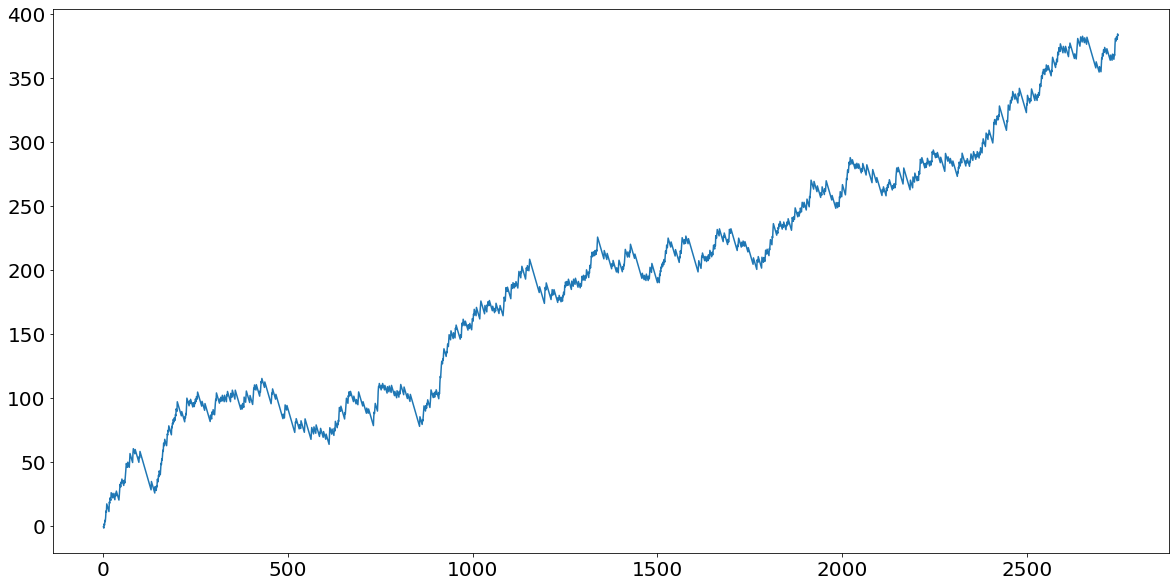

In [290]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 20})
matches.cum_gain.plot()

<AxesSubplot:xlabel='year'>

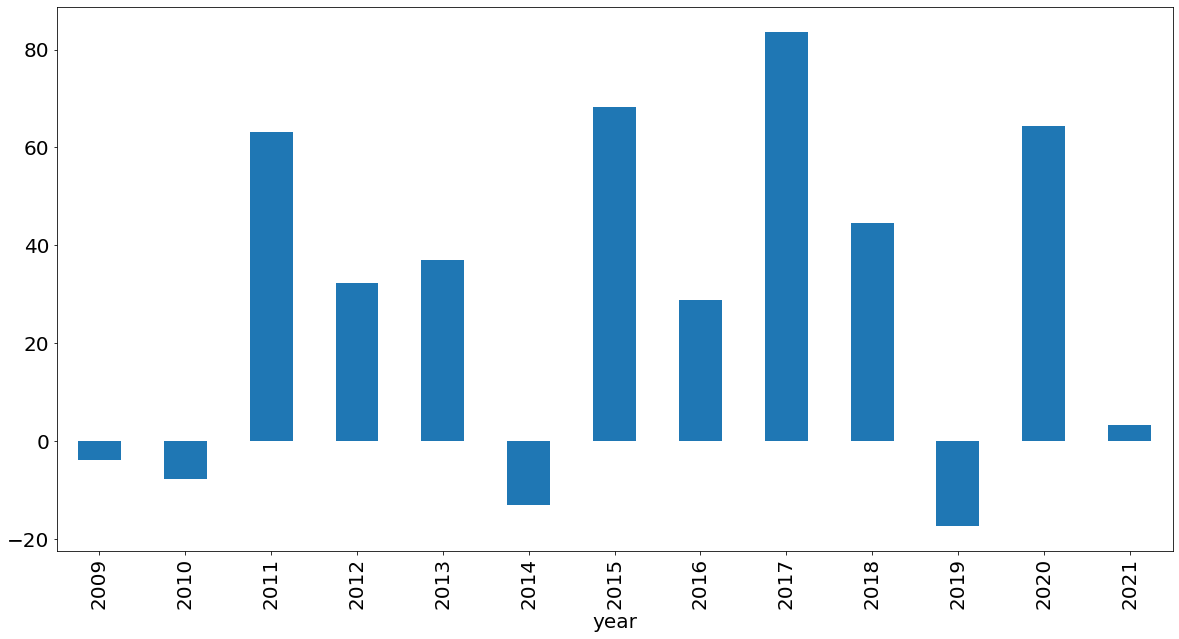

In [291]:
gain_by_year.plot.bar()

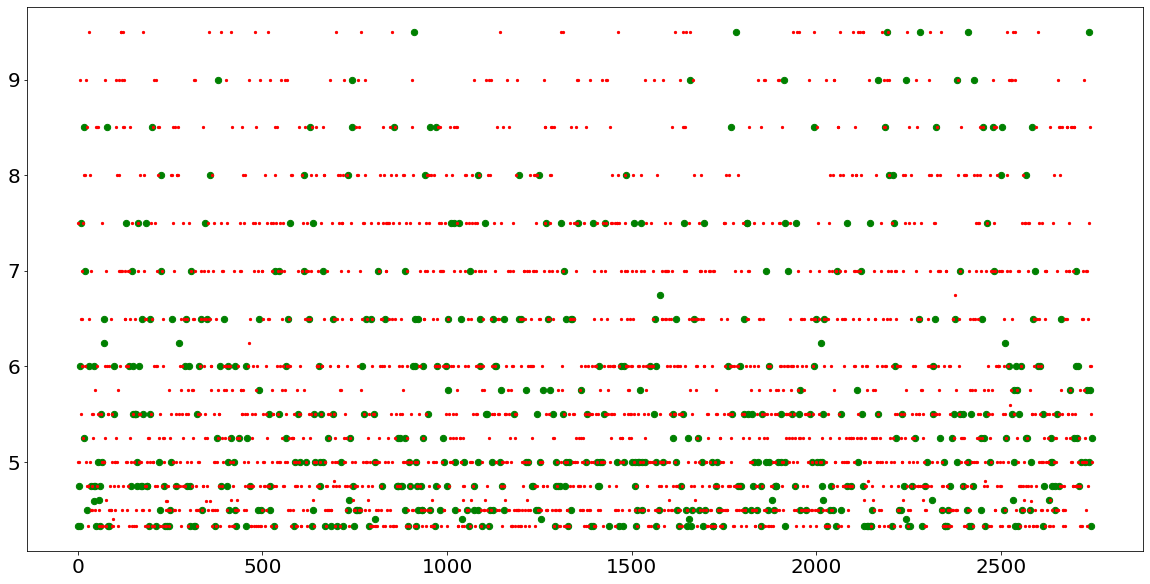

In [292]:
plt.scatter(x = matches[matches.gain > 0].index, y=matches[matches.gain > 0][f"bet365_{strategy.get('result')}"], s=40, color='green')
plt.scatter(x = matches[matches.gain < 0].index, y=matches[matches.gain < 0][f"bet365_{strategy.get('result')}"], color='red', s=5)

<AxesSubplot:xlabel='country'>

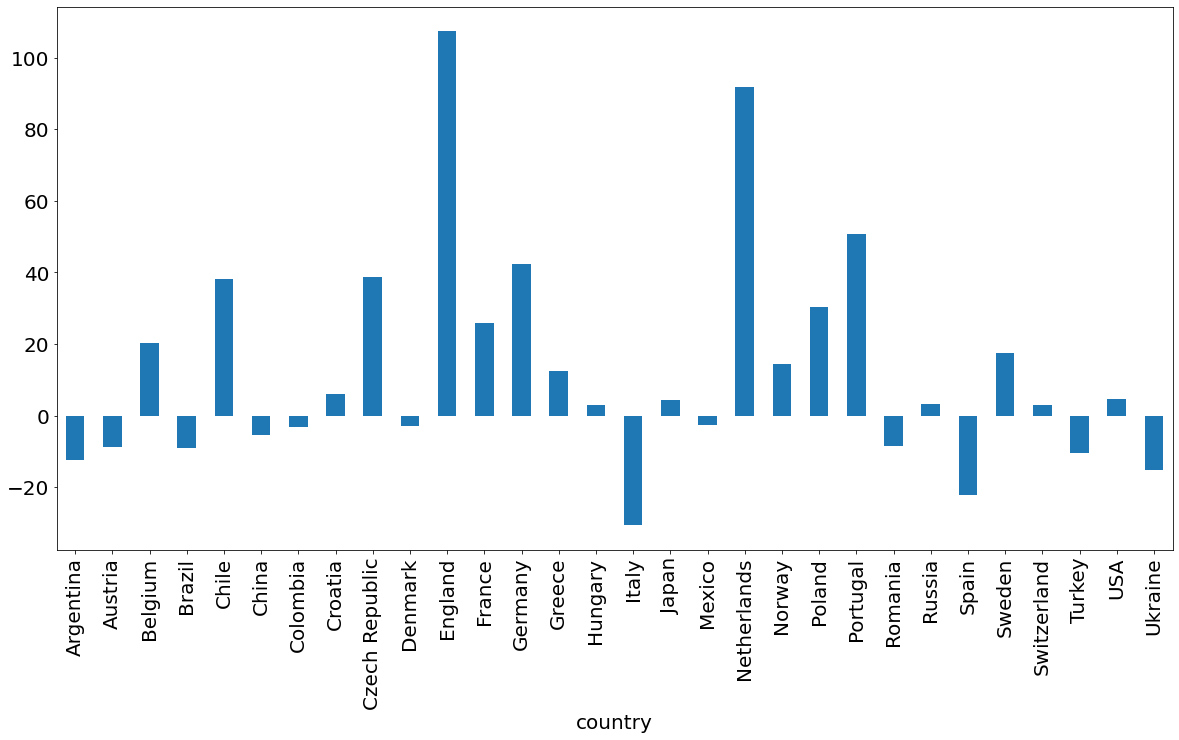

In [293]:
gain_by_country = matches.groupby(by='country')["gain"]
gain_by_country.sum().plot.bar()

<AxesSubplot:xlabel='league'>

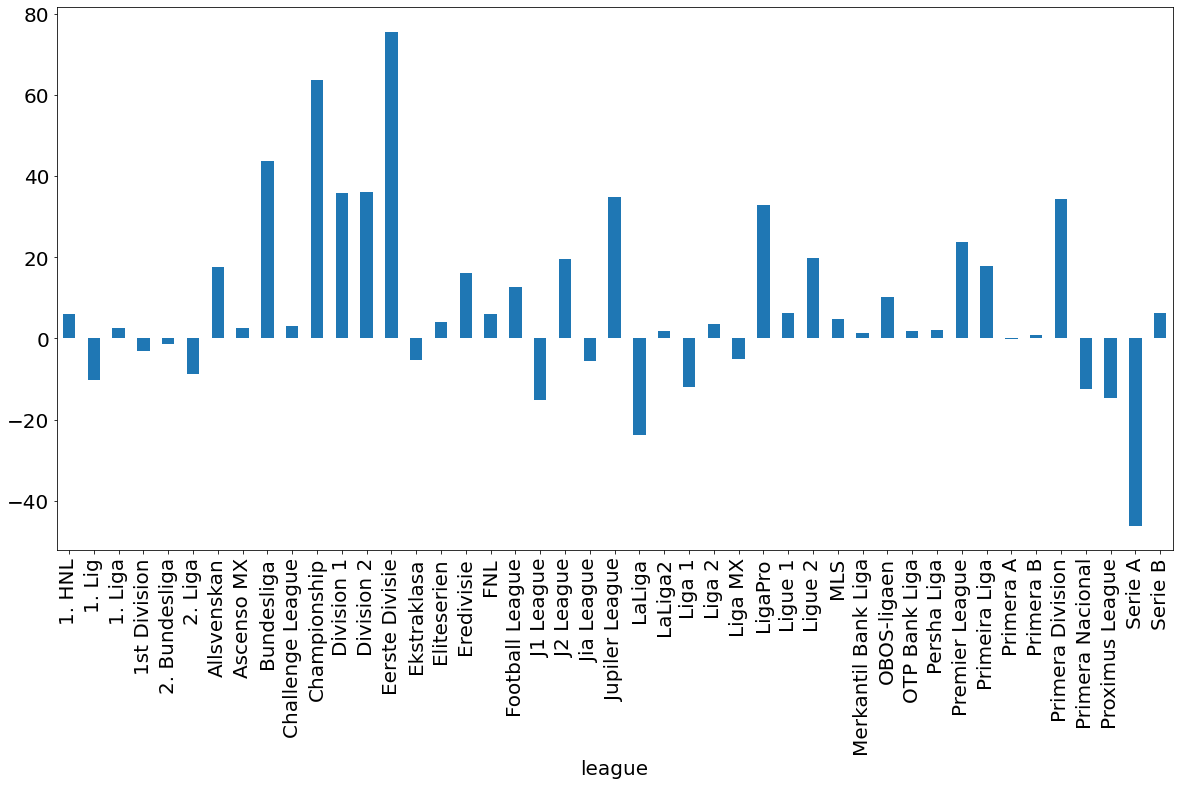

In [294]:
gain_by_league = matches.groupby(by='league')["gain"].sum()
gain_by_league.plot.bar()